<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #6495ed; margin-bottom:10px;">
  <h4 style="font-size:13px;">📦 <strong>Importar Librerias</strong></h4>
</div>

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from mlflow.models.signature import infer_signature

<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #6495ed; margin-bottom:10px;">
  <h4 style="font-size:13px;">🌸 <strong>Importar DataSet Iris</strong></h4>
</div>

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

df_0_1 = df[df["target"].isin([0, 1])] # 0:setosa 1:versicolor

df_virginica = df[df["target"] == 2]
df_2_0 = df_virginica.sample( n = 25 )
df_2_1 = df_virginica.drop(df_2_0.index).sample( n = 25 )

df_iris = pd.concat([df_0_1, df_2_0, df_2_1], ignore_index=True)

df_iris = df_iris.rename(
    columns = {
        'sepal length (cm)': 'sepal_length',
        'sepal width (cm)' : 'sepal_width',
        'petal length (cm)': 'petal_length',
        'petal width (cm)' : 'petal_width'
    }
)

# 4. Separar variables
#X = df_iris[iris.feature_names]
FEATURES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_iris[FEATURES]
y = df_iris["target"]



In [3]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,7.7,3.0,6.1,2.3
146,6.1,3.0,4.9,1.8
147,6.7,3.3,5.7,2.1
148,6.7,2.5,5.8,1.8


<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #f4a460; margin-bottom:10px;">
  <h4 style="font-size:13px;">✂️ <strong>Divide en entrenamiento y prueba</strong></h4>
</div>

In [4]:
procen_test = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = procen_test, random_state = 42)

<div style="background-color:AliceBlue; padding:10px; border-left:5px solid #2e8b57; margin-bottom:10px;">
  <h4 style="font-size:13px;">🤖 <strong>Entrenamiento del Modelo</strong></h4>
</div>

In [5]:
try:
    #mlflow.set_tracking_uri("www.localhost:5000")
    mlflow.set_tracking_uri("http://127.0.0.1:8080")
    mlflow.set_experiment("Iris_Classifier")
except Exception as ex:
    print(f"MlFlow: Se produjo el siguiente error : {ex} ")

try:
    with mlflow.start_run():
        # Entrena modelo
        clf = LogisticRegression(max_iter=200)
        clf.fit(X_train, y_train)

        # Predice
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # Loguea parámetros, métricas y modelo
        mlflow.log_param("max_depth", 3)
        mlflow.log_metric("accuracy", acc)
        
        signature = infer_signature(X_train, clf.predict_proba(X_train))
        
        mlflow.sklearn.log_model(
            sk_model= clf,
            artifact_path = "iris_model",
            signature = signature
        )

        print(f"Accuracy: {acc}")
        print("Modelo guardado en MLflow.")
except Exception as ex:
    print(f"MlFlow: Se produjo el siguiente error : {ex} ")

Accuracy: 1.0
Modelo guardado en MLflow.
🏃 View run brawny-auk-31 at: http://127.0.0.1:8080/#/experiments/720179282521742532/runs/4c394e66b7c145518eab485a8e45b992
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/720179282521742532


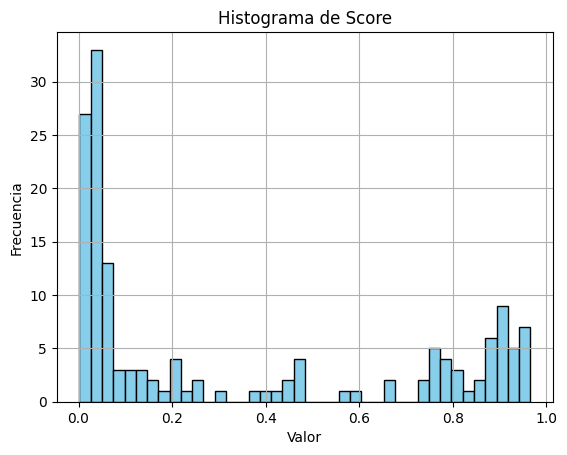

In [6]:
y_pred = clf.predict(X)
y_proba = clf.predict_proba(X)[:, 1]  # Probabilidad para la clase positiva

import numpy as np
import matplotlib.pyplot as plt

# Histograma
plt.hist(y_proba, bins=40, edgecolor='black', color='skyblue')  # Puedes ajustar 'bins' como quieras
plt.title('Histograma de Score')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()